<a href="https://colab.research.google.com/github/pcpiscator/2T2021/blob/main/Furg_ECD_Machine_Learning_II_Semana_01_Desafios_do_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning II - Desafios do Aprendizado de Máquina
### Prof. Marcelo Malheiros

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lei dos grandes números

Aqui fazemos uma demonstração simples dessa lei da Estatística, que mostra que para atingirmos o comportamento previsto precisamos de um grande número de amostras.

Independentemente da distribuição probabilística do problema, com um número pequenos de amostras o ruído natural será muito maior que a tendência. Se isso não for considerado, pode gerar um viés de amostragem nos dados.

O exemplo é feito através de um experimento simples de lançamentos de uma moeda, perfeitamente equilibrada. Ou seja, tanto **cara** como **coroa** terão exatamente 50% de chances em cada lançamento. Faremos 5 séries independentes, cada uma com inicialmente 20 lançamentos de moedas.

In [3]:
prob_coroa = 0.5
séries = 5
lançamentos = 20

Uma representação fácil de visualizar é em uma matriz em que cada coluna é uma série de lançamentos, e em que cada linha é o n-ésimo lançamento de uma série. Usando um gerador de números com distribuição uniforme no intervalo $[0, 1)$, se for abaixo de 0.5 é **cara** (e portanto **0** na matriz) e caso contrário é **coroa** (ou **1** na matriz).

In [4]:
# para garantir reprodutibilidade nas sequências aleatórias
np.random.seed(42)

# matriz com todos os lançamentos
moedas = (np.random.uniform(size=(lançamentos, séries)) >= prob_coroa).astype(int)

# probabilidade acumulativa de coroas em cada série
percentual_coroas = np.cumsum(moedas, axis=0) / np.arange(1, lançamentos + 1).reshape(-1, 1)

In [5]:
# função para plotagem de cada série com uma curva diferente
def mostra_percentuais(percentuais, mínimo, máximo):
    plt.figure(figsize=(12, 4))
    plt.plot(percentuais)
    plt.plot([0, percentuais.shape[0] - 1], [0.5, 0.5], 'k--', label='50%')
    plt.xlabel('Número de lançamentos')
    plt.ylabel('Percentual de coroas')
    plt.legend(loc='lower right')
    plt.axis([0, percentuais.shape[0] - 1, mínimo, máximo])
    plt.show()

As curvas abaixo mostram o percentual **acumulativo** de coroas. Ou seja, qual a razão de coroas sobre as caras até cada momento.

Como pode-se observar, há muita variação relativa entre caras e coroas nos lançamentos iniciais, o que explica a oscilação pronunciada das curvas.

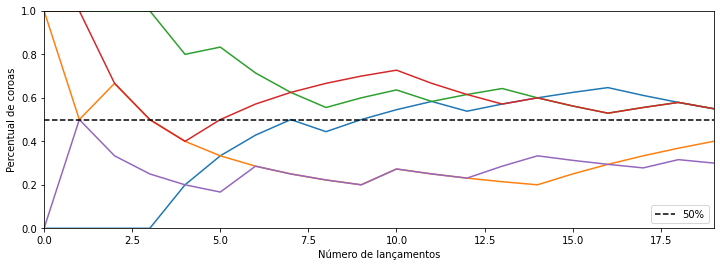

In [6]:
mostra_percentuais(percentual_coroas, 0.0, 1.0)

Se aumentamos o número de lançamentos para 200, na escala do gráfico de 0 a 100% há uma convergência aparente de somente algumas séries para o valor esperado de 0.5.

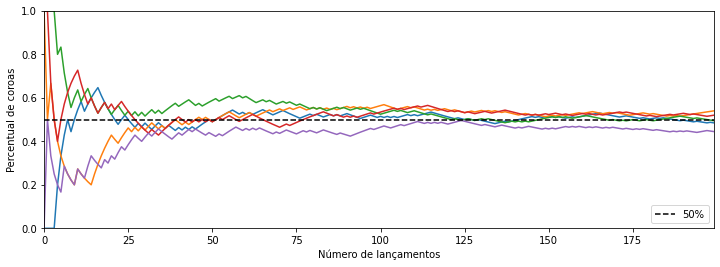

In [7]:
lançamentos = 200

np.random.seed(42)
moedas = (np.random.uniform(size=(lançamentos, séries)) >= prob_coroa).astype(int)
percentual_coroas = np.cumsum(moedas, axis=0) / np.arange(1, lançamentos + 1).reshape(-1, 1)
mostra_percentuais(percentual_coroas, 0.0, 1.0)

Para realmente termos uma convergência bem mais próxima para o valor esperado, precisamos aumentar o número de lançamentos para 20,000. E aproveitamos para dar um _zoom_, exibindo o comportamento das curvas muito mais próximo do valor esperado.

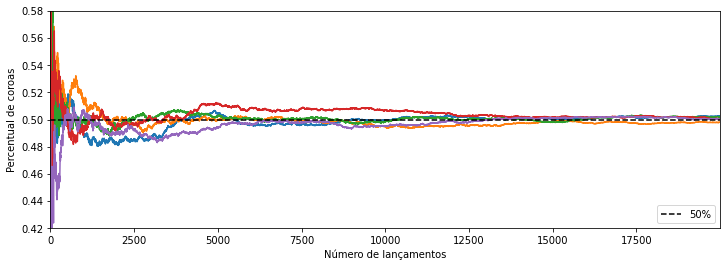

In [8]:
lançamentos = 20000

np.random.seed(42)
moedas = (np.random.uniform(size=(lançamentos, séries)) >= prob_coroa).astype(int)
percentual_coroas = np.cumsum(moedas, axis=0) / np.arange(1, lançamentos + 1).reshape(-1, 1)
mostra_percentuais(percentual_coroas, 0.42, 0.58)

# Geração de dados sintéticos

Muitas vezes é importante testarmos algoritmos e visualizações usando dados aleatórios, porém criados de forma controlada.

A seguir algumas "receitas de bolo" são dadas para criar uma nova coluna com dados sintéticos em um `DataFrame` do Pandas.

In [9]:
# DataFrame vazio
df = pd.DataFrame()

In [10]:
# 10 valores escolhidos aleatoriamente de uma lista (de strings ou de números)
df['A'] = np.random.choice(size=10, a=['a', 'b', 'c'])

In [11]:
# 10 valores escolhidos aleatoriamente de uma lista (de strings ou de números), com probabilidades específicas
df['B'] = np.random.choice(size=10, a=['x', 'y', 'z'], p=[0.1, 0.3, 0.6])

In [12]:
# 10 valores inteiros uniformemente distribuídos entre 20 (dentro) e 50 (fora)
df['C'] = np.random.randint(size=10, low=20, high=50)

In [13]:
# 10 valores reais uniformemente distribuídos no intervalo [20.0, 50.0)
df['D'] = np.random.uniform(size=10, low=20.0, high=50.0)

In [14]:
# 10 valores reais com distribuição normal de média 30.0 e desvio padrão 4.0
df['E'] = np.random.normal(size=10, loc=30.0, scale=4.0)

In [15]:
df

,A,B,C,D,E
0,b,x,38,35.331396,27.604979
1,b,z,45,33.050734,34.493642
2,c,z,35,38.528042,26.182800
3,a,x,38,40.972873,27.241743
4,a,x,49,30.379948,36.963040
5,b,y,41,25.135546,36.478094
6,b,z,38,32.406861,37.385540
7,c,y,40,35.146791,27.043114
8,b,y,39,33.989517,29.140260
9,b,y,33,21.015485,23.313596


Para usar outras distribuições estatísticas: https://numpy.org/doc/stable/reference/random/legacy.html#seeding-and-state

# Cuidados com distribuições estatísticas

Falando de distribuições estatísticas, ainda que as mais comuns sejam a **distribuição uniforme** e a **distribuição normal** (ou gaussiana), seu comportamento pode ser diferente da nossa intuição.

Em particular, em uma distribuição uniforme os valores possíveis têm todos a mesma probabilidade de ocorrer (como no caso anterior dos lançamentos de uma moeda). Mas isso não quer dizer que a saída será homogênea, como poderia-se inicialmente supor.

Para exemplificar, vamos gerar duas séries X e Y de 100 valores reais com distribuição uniforme entre 0 e 100:

In [16]:
np.random.seed(42)
X = np.random.uniform(size=100, low=0.0, high=100.0)
Y = np.random.uniform(size=100, low=0.0, high=100.0)

Se plotadas usando histogramas agrupando as dezenas, é possível ver a irregularidade na quantidade dos valores em cada faixa. Isso faz sentido levando-se em conta a **Lei dos grandes números**: a percepção de homogeneidade só vai acontecer gradativamente, quando mais pontos forem gerados para ambas as séries.

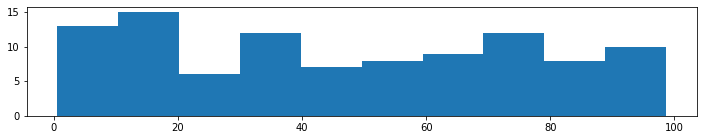

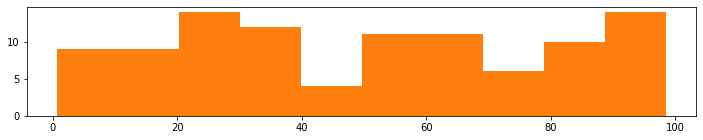

In [17]:
plt.figure(figsize=(12, 2))
plt.hist(X, color='tab:blue')
plt.show()

plt.figure(figsize=(12, 2))
plt.hist(Y, color='tab:orange')
plt.show()

Já para 10,000 valores, temos os seguintes histogramas:

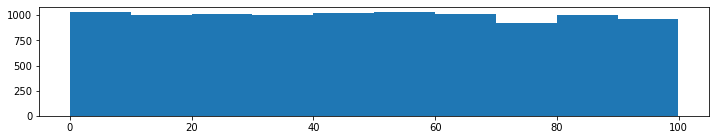

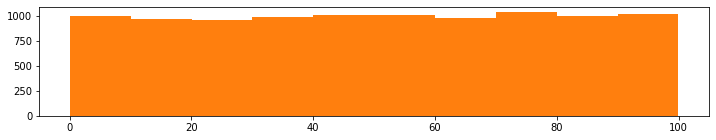

In [18]:
X = np.random.uniform(size=10000, low=0.0, high=100.0)
Y = np.random.uniform(size=10000, low=0.0, high=100.0)

plt.figure(figsize=(12, 2))
plt.hist(X, color='tab:blue')
plt.show()

plt.figure(figsize=(12, 2))
plt.hist(Y, color='tab:orange')
plt.show()

Essa percepção de dispersão se acentua quando interpretamos cada série como um dois atributos de uma mesma instância. Então, plotando um gráfico de dispersão em que X é a coordenada horizontal e Y a vertical, podemos ver que mesmo 10,000 pontos cobrem de maneira irregular o quadrado de todas as possibilidades. Essa é a **maldição da dimensionalidade**.

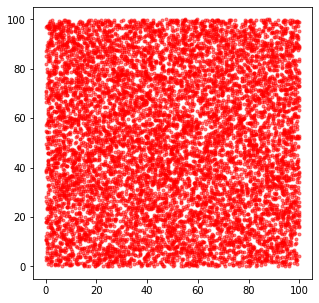

In [19]:
plt.figure(figsize=(5, 5))
plt.plot(X, Y, 'r.', alpha=0.5)
plt.show()

Se a aplicação demanda gerar amostras bem distribuídas em um intervalo, justamente para reduzir erros de amostragem, não é adequado usar valores aleatórios. O ideal nesta situação é usar procedimentos mais elaborados, como por exemplo [sequências de baixa discrepância](https://en.wikipedia.org/wiki/Low-discrepancy_sequence), como a [sequência de Sobol](https://en.wikipedia.org/wiki/Sobol_sequence).

# Limitações de medidas descritivas e de correlação

Um exemplo clássico para ilustrar as limitações de medidas estatísticas descritivas é o [Quarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

Basicamente são quatro curtas séries de dados visualmente bem distintas, mas que têm as principais medidas descritivas praticamente idênticas ([código original](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html)).

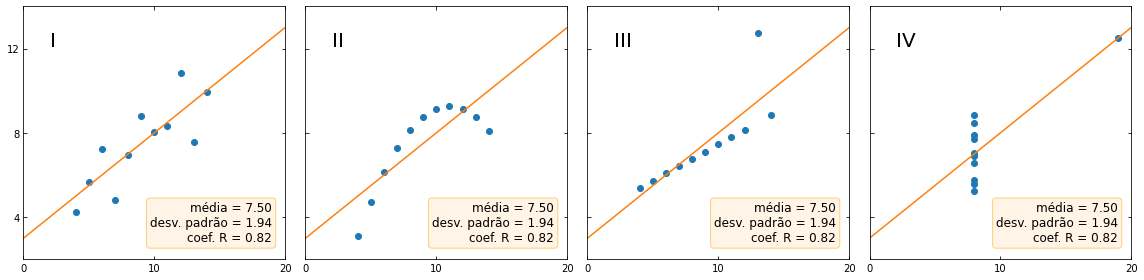

In [20]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {'I': (x, y1), 'II': (x, y2), 'III': (x, y3), 'IV': (x4, y4)}
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16, 4), tight_layout=True)
axs[0].set(xlim=(0, 20), ylim=(2, 14))
axs[0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linha vermelha: regressão linear
    p1, p0 = np.polyfit(x, y, deg=1) # inclinação, ponto de interseção
    ax.plot([0, 20], [p0, 20 * p1 + p0])

    # legenda
    stats = (f'média = {np.mean(y):.2f}\n'
             f'desv. padrão = {np.std(y):.2f}\n'
             f'coef. R = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=12, bbox=bbox, transform=ax.transAxes, horizontalalignment='right')

plt.show()

Na verdade, com um pouco de Álgebra Linear é possível construir dados sintéticos bastante distintos e ainda com medidas descritivas muito similares.

No exemplo abaixo vamos criar sinteticamente duas séries de dados X e Y, usando valores aleatórios como antes. Porém, vamos **reprojetar** os valores de Y em uma série semelhante Z, de forma a garantir que as séries X e Z tenham um coeficiente de correlação R especificado previamente.

In [21]:
# Função para criar uma nova série de valores baseada em y, agora ajustada para
# ter o coeficiente de correlação r em relação a x.
# Traduzida de R para Python, a partir de https://github.com/janhove/cannonball

def reprojetar_y(x, y, r):
    theta = np.arccos(r)
    Xctr  = np.column_stack((x - x.mean(), y - y.mean()))
    Id    = np.eye(x.shape[0])
    Q, _  = np.linalg.qr(Xctr[:, [0]])
    P     = Q * Q.T
    x2o   = np.dot(Id - P, Xctr[:, 1])
    Xc2   = np.column_stack((Xctr[:, 0], x2o))
    Y     = np.dot(Xc2, np.diag(1 / np.sqrt(np.sum(Xc2 * Xc2, axis=0))))
    y     = Y[:, 1] + (1 / np.tan(theta)) * Y[:, 0]
    return y

In [22]:
# função auxiliar, para normalizar uma série de valores para o intervalo [0, 1]

def normalizar(a):
    return (a - min(a)) / (max(a) - min(a))

Para o primeiro exemplo geramos duas séries X e Y com 100 valores aleatórios distribuídos de forma normal, ou seja, segundo uma distribuição gaussiana.

A nova série Z é construída para ter correlação 0.328 com X. Qualquer outro valor de R no intervalo $[-1, 1)$ também pode ser alcançado.

R antes: -0.136 R depois: +0.82


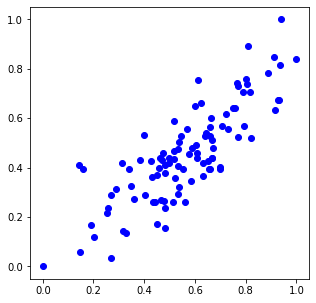

In [23]:
np.random.seed(42)
X = normalizar(np.random.normal(size=100))
Y = normalizar(np.random.normal(size=100))
Z = normalizar(reprojetar_y(X, Y, r=0.82))
print(f'R antes: {np.corrcoef(X, Y)[0, 1]:+.3}', f'R depois: {np.corrcoef(X, Z)[0, 1]:+.3}')
plt.figure(figsize=(5, 5))
#plt.plot(X, Y, 'c.')
plt.plot(X, Z, 'ob')
plt.show()

A seguir criamos os valores de X perfeitamente espaçados, e geramos os valores de Y segundo uma função senóide.

Novamente é possível gerar uma série Z visualmente bastante similar, ainda que com o mesmo coeficiente de correlação 0.328.

R antes: -0.0759 R depois: +0.528


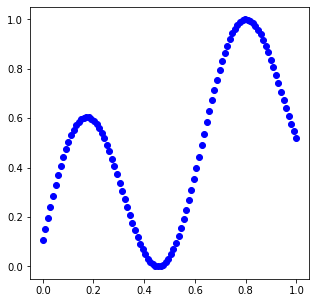

In [24]:
np.random.seed(42)
X = normalizar(np.arange(0, 100))
Y = normalizar(np.sin(X * 10))
Z = normalizar(reprojetar_y(X, Y, r=0.528))
print(f'R antes: {np.corrcoef(X, Y)[0, 1]:+.3}', f'R depois: {np.corrcoef(X, Z)[0, 1]:+.3}')
plt.figure(figsize=(5, 5))
#plt.plot(X, Y, 'c.')
plt.plot(X, Z, 'ob')
plt.show()

# Ferramentas para análise visual da dispersão

Naturalmente que a correlação é uma medida importante, e não deve ser descartada. Porém, deve ser entendida no contexto de uma **possível relação linear entre dois atributos**.

O ideal é sempre acompanhar a análise descritiva de uma visualização usando também **histogramas** e **gráficos de dispersão**.

A seguir eu recomendo três ferramentas de apoio nesse sentido. Para ilustrar, vamos utilizar novamente o clássico _dataset_ IRIS, carregado abaixo para um `DataFrame`.

In [25]:
from sklearn.datasets import load_iris

dataset = load_iris()
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris['label'] = pd.Series([dataset.target_names[k] for k in dataset.target])

In [26]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Matriz de correlação do Pandas

Uma ferramenta bastante simples e que já foi vista é a matriz de correlações entre atributos numéricos, obtida pela função `.corr()` de um `DataFrame`.

In [27]:
corr = iris.corr()

# quanto cada atributo se correlaciona com o valor de 'petal length (cm)'
corr['petal length (cm)'].sort_values(ascending=False)

petal length (cm)    1.000000
petal width (cm)     0.962865
sepal length (cm)    0.871754
sepal width (cm)    -0.428440
Name: petal length (cm), dtype: float64

In [28]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [29]:
corr.style.background_gradient(axis=None, cmap='bwr')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Matriz de dispersão do Pandas

A biblioteca Pandas possui um recurso bem mais sofisticado, que usa a mesma estrutura de matriz para plotar diversos diagramas de dispersão entre os atributos. Além disso, um histograma de cada atributo também é mostrado na diagonal da matriz.

No exemplo abaixo adicionamos ainda uma informação visual de cor, colorindo os rótulos com cores distintas, o que permite examinar a distribuição espacial de cada categoria do _dataset_.

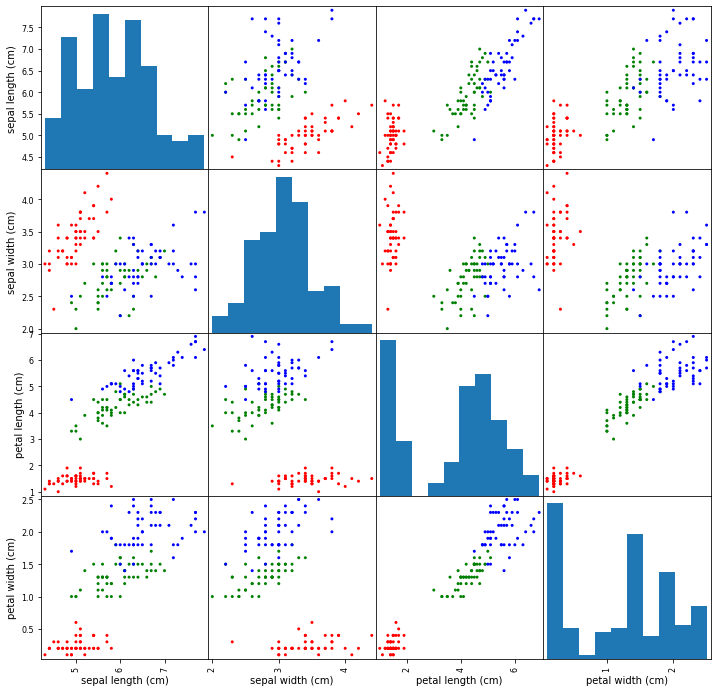

In [30]:
from pandas.plotting import scatter_matrix

colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
scatter_matrix(iris, figsize=(12, 12), color=[colors[l] for l in iris.label], alpha=1.0)
plt.show()